In [100]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [101]:
df = pd.read_csv('text_emotion.csv')
df = df[['sentiment', 'content']].dropna()

In [102]:
df.head(3)

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...


In [103]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [104]:
label = LabelEncoder()
y = label.fit_transform(df['sentiment'])

In [105]:
X = df['content'].values

In [106]:
X.shape

(40000,)

In [107]:
y.shape

(40000,)

In [108]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [109]:
tokens = tokenizer.word_index

In [110]:
#Determine vocabular size
vocabulary_size = len(tokens) + 1
vocabulary_size

48998

In [112]:
#Build Sequences: Helps Convert the phrases of words as their new token value instead of words
sequences = tokenizer.texts_to_sequences(X)
sequences

[[15231, 1, 55, 1, 25, 3309, 2, 120, 4672, 856, 6, 1, 614, 1405, 24, 184, 560],
 [9778, 279, 147, 22, 4, 434, 3559, 2621, 14, 42, 292],
 [2766, 4220, 1766, 236],
 [445, 2, 719, 31, 22, 215, 175],
 [15232, 62, 83, 2, 3310, 22, 262, 186, 101, 2622, 651, 18, 35, 52, 60],
 [747, 6166, 15233, 113, 151, 7, 39, 2, 883, 1378, 5, 1521, 151, 34, 5, 215],
 [1,
  137,
  23,
  134,
  18,
  59,
  26,
  374,
  64,
  91,
  233,
  248,
  186,
  1,
  83,
  18,
  346,
  1606,
  30,
  243,
  68,
  114,
  445,
  13,
  80,
  7508],
 [943, 38, 385, 15234, 58, 9, 179],
 [15235, 15236, 5, 44, 1, 94, 7],
 [15237, 20, 118, 24, 350, 40, 236],
 [189, 803, 636],
 [7509, 14, 100, 9779],
 [286, 1, 15, 2, 1124, 29, 383, 298, 2, 33, 2, 3, 150, 2008],
 [9780,
  74,
  54,
  218,
  3,
  2263,
  10,
  769,
  54,
  60,
  2915,
  57,
  15238,
  8,
  9,
  206,
  155,
  453,
  6,
  453,
  331,
  1,
  19,
  218,
  15239],
 [46, 3, 502],
 [3, 1437, 9, 92, 6, 3, 4673, 9, 316],
 [15240, 2623],
 [16, 977, 109, 6, 40, 26, 166, 17, 3

In [91]:
#Use the dictionary to display specific words and their location in the dictionary. 

In [114]:
list=[579,580,50000]
for k, v in tokens.items():    
    if v in list:
        print(v,k)

579 fail
580 aw


In [115]:
list=['fail','aw','bed']
for k, v in tokens.items():    
    if k in list:
        print(k,v)

bed 147
fail 579
aw 580


In [116]:
#Build Sub-sequences - builds a series of strings to show the next words in the phrase, allowing the LSTM model to learn

subsequences = []

for sequence in sequences:
    for i in range(1, len(sequence)):
        subsequence = sequence[:i+1]
        subsequences.append(subsequence)

In [118]:
#Visualize the new set-up
subsequences

[[15231, 1],
 [15231, 1, 55],
 [15231, 1, 55, 1],
 [15231, 1, 55, 1, 25],
 [15231, 1, 55, 1, 25, 3309],
 [15231, 1, 55, 1, 25, 3309, 2],
 [15231, 1, 55, 1, 25, 3309, 2, 120],
 [15231, 1, 55, 1, 25, 3309, 2, 120, 4672],
 [15231, 1, 55, 1, 25, 3309, 2, 120, 4672, 856],
 [15231, 1, 55, 1, 25, 3309, 2, 120, 4672, 856, 6],
 [15231, 1, 55, 1, 25, 3309, 2, 120, 4672, 856, 6, 1],
 [15231, 1, 55, 1, 25, 3309, 2, 120, 4672, 856, 6, 1, 614],
 [15231, 1, 55, 1, 25, 3309, 2, 120, 4672, 856, 6, 1, 614, 1405],
 [15231, 1, 55, 1, 25, 3309, 2, 120, 4672, 856, 6, 1, 614, 1405, 24],
 [15231, 1, 55, 1, 25, 3309, 2, 120, 4672, 856, 6, 1, 614, 1405, 24, 184],
 [15231, 1, 55, 1, 25, 3309, 2, 120, 4672, 856, 6, 1, 614, 1405, 24, 184, 560],
 [9778, 279],
 [9778, 279, 147],
 [9778, 279, 147, 22],
 [9778, 279, 147, 22, 4],
 [9778, 279, 147, 22, 4, 434],
 [9778, 279, 147, 22, 4, 434, 3559],
 [9778, 279, 147, 22, 4, 434, 3559, 2621],
 [9778, 279, 147, 22, 4, 434, 3559, 2621, 14],
 [9778, 279, 147, 22, 4, 434, 3559

In [119]:
#view the data in line 6
subsequences[5]

[15231, 1, 55, 1, 25, 3309, 2]

In [123]:
#Add padding layer to prevent loss of first words
from keras.preprocessing.sequence import pad_sequences

#Use a loop to find the longest subsequence in the dataset
sequence_length = max([len(sequence) for sequence in sequences])

# Pad all the subsequences with 0's, and add to the front of the data
X = pad_sequences(sequences, maxlen=sequence_length, padding='post')

In [125]:
print(X[0:6])

[[15231     1    55     1    25  3309     2   120  4672   856     6     1
    614  1405    24   184   560     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [ 9778   279   147    22     4   434  3559  2621    14    42   292     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [ 2766  4220  1766   236     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  445     2   719    31    22   215   175     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [15232    62    83     2  3310    22   262   186   101  2622   651    18
  

In [126]:
X.shape

(40000, 37)

In [127]:
y

array([ 2, 10, 10, ...,  7,  5,  7])

In [128]:
y.shape

(40000,)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Create RNN Model to Predict Sentiment

In [130]:
from keras.models import Sequential 
from keras.layers import Embedding, LSTM, Dropout, Dense

In [137]:
model = Sequential()
model.add(Embedding(input_dim = vocabulary_size, output_dim = 10, input_shape = (sequence_length - 1,)))

# First LSTM should return the full sequence to feed into the next LSTM
model.add(LSTM(units = 128, return_sequences=True))
model.add(LSTM(units = 64))  # now receives a 3D input

model.add(Dense(units=100, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=13, activation ='softmax'))

In [138]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 36, 10)         │       489,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 36, 128)        │        71,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │         6,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 13)             │         1,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 618,369 (2.36 MB)

 Trainable params: 618,369 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [139]:
#Compile the network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [140]:
#train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=256, verbose=0, validation_data=(X_test, y_test))

#### Fit the model


In [143]:
from livelossplot import PlotLossesKeras

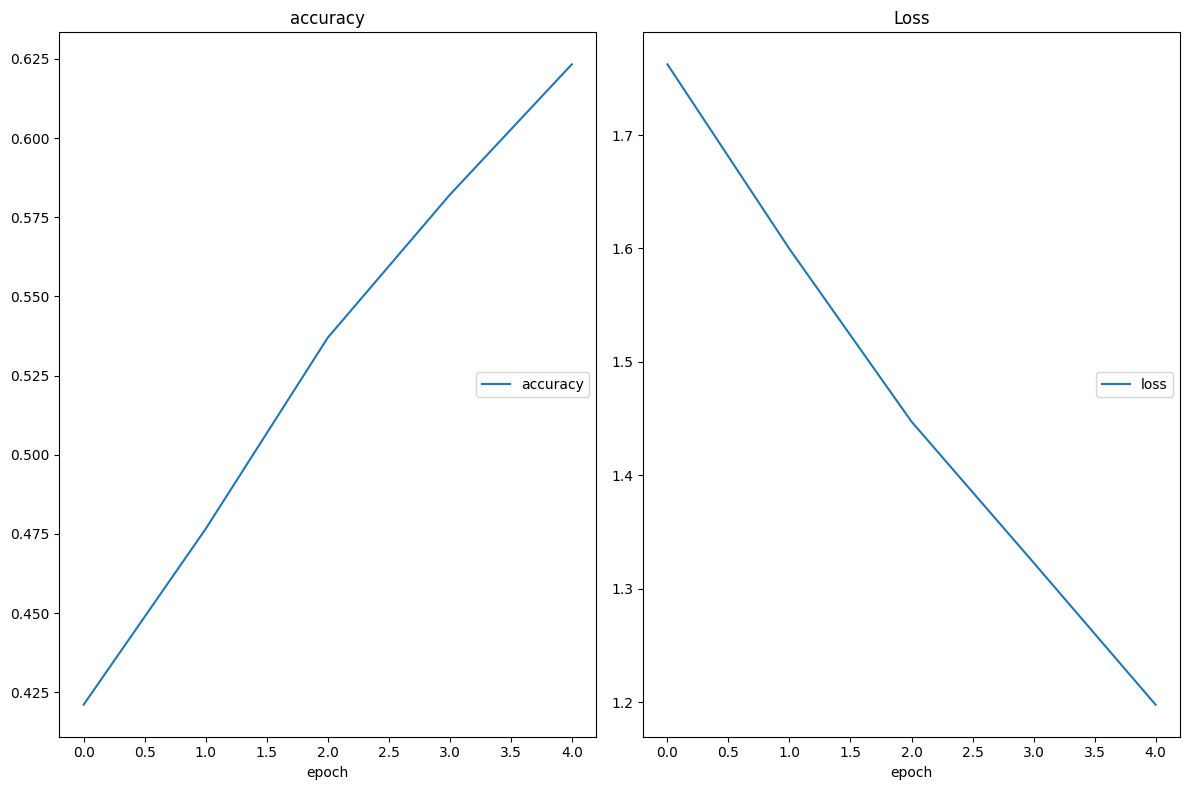

accuracy
	accuracy         	 (min:    0.421, max:    0.623, cur:    0.623)
Loss
	loss             	 (min:    1.198, max:    1.762, cur:    1.198)
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 53ms/step - accuracy: 0.6277 - loss: 1.1862


In [145]:
model.fit(X, y,
          callbacks=[PlotLossesKeras()],
          epochs = 5)

#### Evaluate the Model

In [151]:
loss, acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {acc*100:.2f}%')

375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6288 - loss: 1.1596

Test accuracy: 63.36%


### Predict using the model

In [165]:
label_map = {
    0: 'anger',
    1: 'joy',
    2: 'fear',
    3: 'surprise',
    4: 'love',
    5: 'sadness',
    6: 'disgust',
    7: 'optimism',
    8: 'pessimism',
    9: 'trust',
    10: 'anticipation',
    11: 'boredom',
    12: 'neutral'
}

tweet = "I'm really happy with the service!"
sequence = tokenizer.texts_to_sequences([tweet])
padded = pad_sequences(sequence, maxlen=sequence_length, padding='post')

prediction = model.predict(padded)
predicted_class = np.argmax(prediction, axis=1)[0]

print("Predicted sentiment:", label_map[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted sentiment: optimism


In [160]:

label_encoder = LabelEncoder()
label_encoder.fit(y_train)  # or whatever labels you used during training

tweet = "I'm really happy with the service!"
sequence = tokenizer.texts_to_sequences([tweet])
padded = pad_sequences(sequence, maxlen=sequence_length, padding='post')

# Predict
prediction = model.predict(padded)
predicted_class = np.argmax(prediction, axis=1)[0]

# Decode
sentiment_label = label_encoder.inverse_transform([predicted_class])[0]
print("Predicted sentiment:", sentiment_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted sentiment: 7
